# HIGH PRESSURE PROJECT

In [ ]:
## This is the markdown version of the python notebook which is within this repository folder

In [1]:
# Importing necessary libraries for data manipulation and machine learning
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 

In [2]:
weather_df =  pd.read_csv("weather.txt", 
                      delimiter = ';')

#### Abbreviations used in the data:	
**STATIONS ID**	weather station (location)\
**MESS DATUM**	date of measurement, in YYYYMMDD-format\
**QN 3**	unknown, just ignore\
**FX**	probably maximum wind speed\
**FM**	probably average wind speed\
**QN 4**	unknown, just ignore\
**RSK**	total precipitation that day\
**RSKF**	type of precipitation\
**SDK**	sunshine duration in hours\
**SHK TAG**	height of (probably only new?) snow fall, in cm\
**NM**	cloud amount, averaged over the day, from 0.0 to 8.0\
**VPM**	daily mean of vapor pressure in hPa\
**PM**	daily mean of atmospheric pressure in hPa\
**TMK**	daily mean of air temperature in 2m height, in °C\
**UPM**	daily mean of relative humidity, in %\
**TXK**	daily maximum of air temperature in 2m height, in °C\
**TNK**	daily minimum of air temperature in 2m height, in °C\
**TGK**	daily minimum of air temperature in 0m height, in °C\
**eor**	end of row

In [164]:
weather_df # RAW DATA

,STATIONS_ID,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
0,1420,19490101,-999,-999.0,-999.0,5,4.3,1,-999.000,0,8.0,6.3,977.20,6.6,65.00,9.2,1.5,1.0,eor
1,1420,19490102,-999,-999.0,-999.0,5,2.3,1,-999.000,0,8.0,6.9,981.80,2.4,94.00,7.1,0.5,2.2,eor
2,1420,19490103,-999,-999.0,-999.0,5,0.1,1,-999.000,0,5.0,6.4,993.10,2.0,88.00,5.0,0.1,-0.3,eor
3,1420,19490104,-999,-999.0,-999.0,5,0.0,1,-999.000,0,6.7,5.6,1000.40,2.4,78.00,3.7,-1.6,-3.4,eor
4,1420,19490105,-999,-999.0,-999.0,5,0.0,1,-999.000,0,8.0,6.7,1011.20,3.5,86.00,5.3,1.6,1.2,eor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1420,20221227,3,9.4,4.0,3,0.0,6,5.867,0,4.1,6.7,1014.68,3.6,85.17,6.9,-1.5,-3.4,eor
27024,1420,20221228,3,-999.0,5.5,3,0.0,6,0.000,0,7.9,7.9,1004.46,6.9,79.29,10.3,2.3,0.6,eor
27025,1420,20221229,3,20.1,8.2,3,4.1,6,0.400,0,7.8,9.6,997.41,10.8,74.13,12.5,6.3,2.0,eor
27026,1420,20221230,3,13.4,4.9,3,1.1,6,2.117,0,6.4,9.3,999.98,8.3,84.54,13.4,4.0,0.2,eor


In [165]:
weather_df.describe()

,STATIONS_ID,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK
count,27028.0,2.702800e+04,27028.000000,27028.000000,27028.00000,27028.000000,27028.000000,27028.000000,27028.000000,27028.000000,27028.000000,27028.000000,27028.000000,27028.000000,27028.000000,27028.000000,27028.000000,27028.000000
mean,1420.0,1.985567e+07,-257.268462,-256.581375,-261.77026,7.679814,1.723835,2.886377,-16.875645,0.261211,5.322384,9.935674,1003.152555,10.311377,75.139283,14.707744,5.815125,3.943547
std,0.0,2.136004e+05,443.764200,445.070239,442.03408,2.556145,4.016078,3.028301,145.120503,1.566048,2.175491,4.065507,8.540712,7.521075,12.933091,8.792094,6.710444,6.921417
min,1420.0,1.949010e+07,-999.000000,-999.000000,-999.00000,3.000000,0.000000,0.000000,-999.000000,0.000000,0.000000,1.100000,955.900000,-18.000000,25.000000,-15.000000,-21.600000,-26.200000
25%,1420.0,1.967070e+07,-999.000000,-999.000000,-999.00000,5.000000,0.000000,0.000000,0.200000,0.000000,4.000000,6.700000,998.100000,4.500000,66.000000,7.700000,0.800000,-0.700000
50%,1420.0,1.985567e+07,5.000000,8.200000,2.30000,10.000000,0.000000,1.000000,3.300000,0.000000,5.800000,9.400000,1003.400000,10.400000,77.000000,14.800000,5.900000,4.100000
75%,1420.0,2.004070e+07,10.000000,11.300000,3.60000,10.000000,1.600000,6.000000,7.800000,0.000000,7.000000,12.900000,1008.600000,16.200000,85.000000,21.600000,11.125000,9.300000
max,1420.0,2.022123e+07,10.000000,36.000000,12.80000,10.000000,109.700000,8.000000,15.900000,32.000000,8.000000,24.900000,1033.200000,32.000000,100.000000,40.100000,25.700000,23.500000


key points:
all stations are the same \
date is in yyyymmdd

In [166]:
weather_df.STATIONS_ID.unique

<bound method Series.unique of 0        1420
1        1420
2        1420
3        1420
4        1420
         ... 
27023    1420
27024    1420
27025    1420
27026    1420
27027    1420
Name: STATIONS_ID, Length: 27028, dtype: int64>

##### We drop QN_3 and QN_4 because they are irrelevant according to the sheet. STATIONS_ID has the same value as seen in the previous cell so we drop that, along with 'eor' which represents end of line in the raw dataset

In [167]:
weather_df= weather_df.drop(["STATIONS_ID", "QN_3",'QN_4','eor'],axis =1)

In [168]:
# Remove all spaces from the name of each column
weather_df.columns = weather_df.columns.str.replace(' ', '')

# Display the updated columns to verify the changes
weather_df.columns

Index(['MESS_DATUM', 'FX', 'FM', 'RSK', 'RSKF', 'SDK', 'SHK_TAG', 'NM', 'VPM',
       'PM', 'TMK', 'UPM', 'TXK', 'TNK', 'TGK'],
      dtype='object')

In [169]:
weather_df= weather_df.replace(-999, np.nan) # replace -999 with null value for ease of operations . -999 are invalid vaues according ot hte sheet

In [170]:
weather_df.describe() # final raw data

,MESS_DATUM,FX,FM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK
count,2.702800e+04,19883.000000,19881.000000,27028.000000,27028.000000,26451.000000,27028.000000,27028.000000,27028.000000,27028.000000,27028.000000,27028.000000,27028.000000,27028.000000,27028.000000
mean,1.985567e+07,10.208399,3.255691,1.723835,2.886377,4.548337,0.261211,5.322384,9.935674,1003.152555,10.311377,75.139283,14.707744,5.815125,3.943547
std,2.136004e+05,3.776468,1.600899,4.016078,3.028301,4.308528,1.566048,2.175491,4.065507,8.540712,7.521075,12.933091,8.792094,6.710444,6.921417
min,1.949010e+07,1.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,955.900000,-18.000000,25.000000,-15.000000,-21.600000,-26.200000
25%,1.967070e+07,7.500000,2.100000,0.000000,0.000000,0.300000,0.000000,4.000000,6.700000,998.100000,4.500000,66.000000,7.700000,0.800000,-0.700000
50%,1.985567e+07,9.800000,2.900000,0.000000,1.000000,3.500000,0.000000,5.800000,9.400000,1003.400000,10.400000,77.000000,14.800000,5.900000,4.100000
75%,2.004070e+07,12.300000,4.100000,1.600000,6.000000,7.900000,0.000000,7.000000,12.900000,1008.600000,16.200000,85.000000,21.600000,11.125000,9.300000
max,2.022123e+07,36.000000,12.800000,109.700000,8.000000,15.900000,32.000000,8.000000,24.900000,1033.200000,32.000000,100.000000,40.100000,25.700000,23.500000


### We look for the longest stream of rows with no missing values at all and use that subset only

In [171]:
sequence = np.array(weather_df.dropna(how='any').index)                                                                             # source https://stackoverflow.com/questions/54066898/find-longest-subsequence-without-nan-values-in-set-of-series
longest_seq = max(np.split(sequence, np.where(np.diff(sequence) != 1)[0]+1), key=len)    
weather_df= weather_df.iloc[longest_seq]

In [172]:
weather_df

,MESS_DATUM,FX,FM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK
7305,19690101,10.1,3.9,2.6,8,0.0,18,7.3,5.1,1015.4,-1.3,92.0,0.0,-4.9,-11.5
7306,19690102,8.2,4.0,0.3,1,0.0,11,7.7,6.9,1010.3,3.1,95.0,4.8,-0.4,-1.1
7307,19690103,8.2,3.0,0.0,0,0.0,0,7.3,6.1,1012.7,1.8,85.0,4.8,0.5,1.3
7308,19690104,4.5,1.3,0.0,0,0.0,0,7.0,5.6,1010.0,0.2,91.0,1.6,-0.3,-0.8
7309,19690105,6.1,1.9,0.0,0,0.0,0,7.7,4.8,1005.0,-0.6,80.0,0.5,-1.1,-1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,19930514,8.8,3.9,0.0,0,3.2,0,4.7,12.7,988.4,13.8,78.0,18.5,11.7,12.7
16205,19930515,19.2,2.3,2.1,6,4.9,0,3.3,11.6,996.4,11.8,79.0,19.8,5.8,3.7
16206,19930516,9.9,1.8,0.0,0,11.8,0,2.7,9.0,1006.5,12.4,64.0,18.3,2.6,0.4
16207,19930517,10.0,2.6,0.0,0,13.0,0,1.7,10.7,1001.2,17.0,56.0,24.5,6.7,4.3


In [173]:
weather_df.shape

(8904, 15)

In [174]:
weather_df.info() # all non-null

<class 'pandas.core.frame.DataFrame'>
Index: 8904 entries, 7305 to 16208
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MESS_DATUM  8904 non-null   int64  
 1   FX          8904 non-null   float64
 2   FM          8904 non-null   float64
 3   RSK         8904 non-null   float64
 4   RSKF        8904 non-null   int64  
 5   SDK         8904 non-null   float64
 6   SHK_TAG     8904 non-null   int64  
 7   NM          8904 non-null   float64
 8   VPM         8904 non-null   float64
 9   PM          8904 non-null   float64
 10  TMK         8904 non-null   float64
 11  UPM         8904 non-null   float64
 12  TXK         8904 non-null   float64
 13  TNK         8904 non-null   float64
 14  TGK         8904 non-null   float64
dtypes: float64(12), int64(3)
memory usage: 1.1 MB


##### Since weather patterns often align with the month of the years (seasons), the year is removed and only the month and day is kept to be considered

In [177]:
weather_df['MESS_DATUM'] = weather_df['MESS_DATUM'].apply(str).str.slice(4,10)


In [202]:
weather_df['MESS_DATUM'] = weather_df['MESS_DATUM'].astype(int) #convert the date to feed into numpy

In [178]:
weather_df #final dataset

,MESS_DATUM,FX,FM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK
7305,0101,10.1,3.9,2.6,8,0.0,18,7.3,5.1,1015.4,-1.3,92.0,0.0,-4.9,-11.5
7306,0102,8.2,4.0,0.3,1,0.0,11,7.7,6.9,1010.3,3.1,95.0,4.8,-0.4,-1.1
7307,0103,8.2,3.0,0.0,0,0.0,0,7.3,6.1,1012.7,1.8,85.0,4.8,0.5,1.3
7308,0104,4.5,1.3,0.0,0,0.0,0,7.0,5.6,1010.0,0.2,91.0,1.6,-0.3,-0.8
7309,0105,6.1,1.9,0.0,0,0.0,0,7.7,4.8,1005.0,-0.6,80.0,0.5,-1.1,-1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16204,0514,8.8,3.9,0.0,0,3.2,0,4.7,12.7,988.4,13.8,78.0,18.5,11.7,12.7
16205,0515,19.2,2.3,2.1,6,4.9,0,3.3,11.6,996.4,11.8,79.0,19.8,5.8,3.7
16206,0516,9.9,1.8,0.0,0,11.8,0,2.7,9.0,1006.5,12.4,64.0,18.3,2.6,0.4
16207,0517,10.0,2.6,0.0,0,13.0,0,1.7,10.7,1001.2,17.0,56.0,24.5,6.7,4.3


## QR decomposition algorithm and least squares regression by QR

In [429]:
#The Implementation of for QR decomposition Algorithm - Gram  Schmidt Process
def qr_decomposition(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for k in range(n):
        u = A[:, k]
        for i in range(k):
            R[i, k] = np.dot(Q[:, i].T, A[:, k])
            u = u - R[i, k] * Q[:, i]
        R[k, k] = np.linalg.norm(u)
        Q[:, k] = u / R[k, k]
    
    return Q, R

In [433]:
#The implmentation of Least square regression using QR Decomposition

def least_squares_qr(A, b):
    Q, R = qr_decomposition(A)
    Q_T_y = np.dot( np.linalg.solve(R, QtQ.T, b))
    beta = np.zeros(R.shape[1])
    
    # Back substitution to solve R * beta = Q.T * y
    for i in range(R.shape[1] - 1, -1, -1):
        beta[i] = Q_T_y[i] / R[i, i]
        for j in range(i):
            Q_T_y[j] -= R[j, i] * beta[i]
    
    return beta

In [ ]:
def least_squares_numpy_qr(A, b):
    """Solve the least squares problem Ax = b using QR decomposition."""
    Q, R = qr_decomposition(A)
    Qt_b = np.dot(Q.T, b)
    x = np.linalg.solve(R, Qt_b)
    return x

In [ ]:
least_squares_numpy_qr(A,b)

#### Implementation of the library (optional)

In [ ]:

def least_squares_qr(A, b):
    Q, R = qr_decomposition(A)
    Q_T_b = np.dot(Q.T, b)
    x = np.linalg.solve(R, Q_T_b)
    return x

## Implementation


#### Adding target column from current SDK

##### We want to see dependance of various features on the sunshine of the next day. So we make a duplicate of the column and move it one cell upwards

In [305]:
weather_df['target']= weather_df['SDK']


In [306]:
weather_df['target'] =weather_df['target'].shift(-1)
weather_df

,MESS_DATUM,FX,FM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,target
7305,101,10.1,3.9,2.6,8,0.0,18,7.3,5.1,1015.4,-1.3,92.0,0.0,-4.9,-11.5,0.0
7306,102,8.2,4.0,0.3,1,0.0,11,7.7,6.9,1010.3,3.1,95.0,4.8,-0.4,-1.1,0.0
7307,103,8.2,3.0,0.0,0,0.0,0,7.3,6.1,1012.7,1.8,85.0,4.8,0.5,1.3,0.0
7308,104,4.5,1.3,0.0,0,0.0,0,7.0,5.6,1010.0,0.2,91.0,1.6,-0.3,-0.8,0.0
7309,105,6.1,1.9,0.0,0,0.0,0,7.7,4.8,1005.0,-0.6,80.0,0.5,-1.1,-1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16202,512,10.1,2.0,3.7,6,7.7,0,5.3,14.8,992.6,18.0,71.0,24.1,13.5,5.3,1.5
16203,513,8.5,2.6,2.6,6,1.5,0,6.7,15.2,985.0,15.4,85.0,18.2,13.0,12.4,3.2
16204,514,8.8,3.9,0.0,0,3.2,0,4.7,12.7,988.4,13.8,78.0,18.5,11.7,12.7,4.9
16205,515,19.2,2.3,2.1,6,4.9,0,3.3,11.6,996.4,11.8,79.0,19.8,5.8,3.7,11.8


In [307]:
weather_df.drop(weather_df.tail(1).index,inplace=True) # drop last row
weather_df

,MESS_DATUM,FX,FM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,target
7305,101,10.1,3.9,2.6,8,0.0,18,7.3,5.1,1015.4,-1.3,92.0,0.0,-4.9,-11.5,0.0
7306,102,8.2,4.0,0.3,1,0.0,11,7.7,6.9,1010.3,3.1,95.0,4.8,-0.4,-1.1,0.0
7307,103,8.2,3.0,0.0,0,0.0,0,7.3,6.1,1012.7,1.8,85.0,4.8,0.5,1.3,0.0
7308,104,4.5,1.3,0.0,0,0.0,0,7.0,5.6,1010.0,0.2,91.0,1.6,-0.3,-0.8,0.0
7309,105,6.1,1.9,0.0,0,0.0,0,7.7,4.8,1005.0,-0.6,80.0,0.5,-1.1,-1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16201,511,8.7,2.5,0.0,0,11.4,0,4.0,12.2,998.9,20.5,51.0,27.4,12.4,9.5,7.7
16202,512,10.1,2.0,3.7,6,7.7,0,5.3,14.8,992.6,18.0,71.0,24.1,13.5,5.3,1.5
16203,513,8.5,2.6,2.6,6,1.5,0,6.7,15.2,985.0,15.4,85.0,18.2,13.0,12.4,3.2
16204,514,8.8,3.9,0.0,0,3.2,0,4.7,12.7,988.4,13.8,78.0,18.5,11.7,12.7,4.9


# d) i) Implementation 1: Find relation between Sunshine duration on a day vs. sunshine duration of the following day,

In [356]:
b = weather_df['target'].values
print(b)

[ 0.   0.   0.  ...  3.2  4.9 11.8]


In [360]:
A= weather_df[['SDK']]
print(A)

        SDK
7305    0.0
7306    0.0
7307    0.0
7308    0.0
7309    0.0
...     ...
16201  11.4
16202   7.7
16203   1.5
16204   3.2
16205   4.9

[8901 rows x 1 columns]


In [361]:
# Adding a column of ones to X matrices for the intercept term
A = np.hstack((np.ones((A.shape[0], 1)), A))
print(A)

[[1.  0. ]
 [1.  0. ]
 [1.  0. ]
 ...
 [1.  1.5]
 [1.  3.2]
 [1.  4.9]]


### coefficients of the least squared line 

In [363]:
beta = least_squares_qr_numpy(A, b)


In [364]:
print(np.shape(A)) 
print(np.shape(b))

(8901, 2)
(8901,)


In [365]:
y_hat = np.dot(A, beta)
print(y_hat)

[1.80808098 1.80808098 1.80808098 ... 2.68502732 3.67889984 4.67277235]


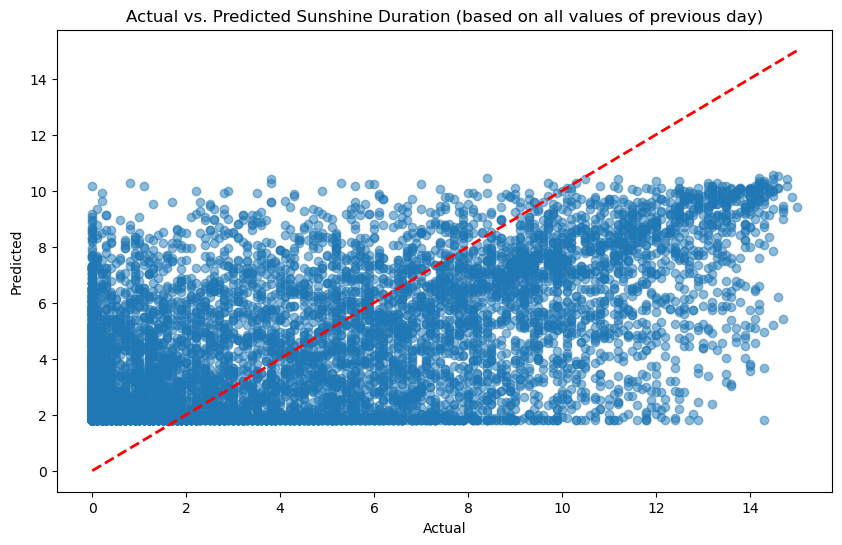

In [366]:
import matplotlib.pyplot as plt

# Function to plot actual vs. predicted values
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()

# Plot for each model
plot_actual_vs_predicted(b, y_hat, 'Actual vs. Predicted Sunshine Duration (based on all values of previous day)')

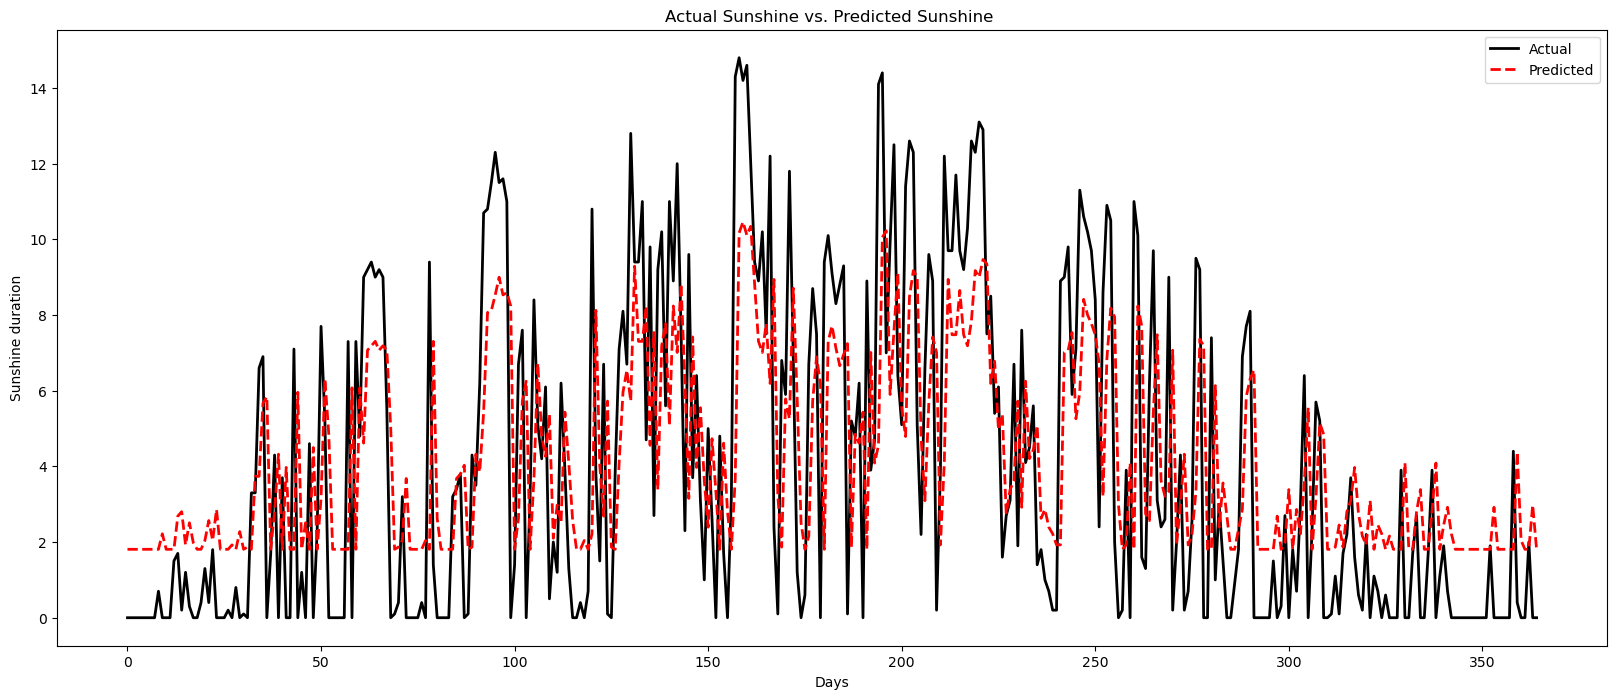

In [369]:
# Function to plot actual vs. predicted values with annotations
def plot_with_annotations(y_true, y_pred, start=0, end=100):
    plt.figure(figsize=(20, 8))
    
    # Subset of data for clearer visualization
    y_true_subset = y_true[start:end]
    y_pred_subset= y_pred[start:end]
    days = np.arange(start, end)
    
    # Plot actual values
    plt.plot(days, y_true_subset, label='Actual', color='black', linewidth=2)
    
    # Plot predicted values with smoother lines
    plt.plot(days, y_pred_subset, label='Predicted', color='red', linestyle='--', linewidth=2)
    
    # Add title and labels
    plt.title('Actual Sunshine vs. Predicted Sunshine ')
    plt.xlabel('Days')
    plt.ylabel('Sunshine duration')
    
    # Add legend
    plt.legend()
    
    # Display the plot
    plt.show()

# Plot the graphs
plot_with_annotations(b, y_hat, start=0, end=365) # change these values to visualise subset of rows


In [370]:
# Calculate R-squared for evaluation
def r_squared(y_target, y_pred):
    ss_total = np.sum((y_target - np.mean(y_target)) ** 2)
    ss_residual = np.sum((y_target - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

r_squared_sunshine_onlyQR = r_squared(b, y_hat)

print("R-squared metric:", r_squared_sunshine_onlyQR)


R-squared metric: 0.34171311351224165


R-squared is a statistical measure of how close the data are to the fitted regression line. The definition of R-squared is the percentage of the response variable variation that is explained by a linear model.
~0% r squared => bad
~100% r squared =>  good

# d) ii) Current athmospheric pressure (PM) vs. sunshine duration of the following day.
## Which is the superior predictor?

[ 0.   0.   0.  ...  3.2  4.9 11.8]
           PM
7305   1015.4
7306   1010.3
7307   1012.7
7308   1010.0
7309   1005.0
...       ...
16201   998.9
16202   992.6
16203   985.0
16204   988.4
16205   996.4

[8901 rows x 1 columns]
[[1.0000e+00 1.0154e+03]
 [1.0000e+00 1.0103e+03]
 [1.0000e+00 1.0127e+03]
 ...
 [1.0000e+00 9.8500e+02]
 [1.0000e+00 9.8840e+02]
 [1.0000e+00 9.9640e+02]]
(8901, 2)
(8901,)
[5.31237558 4.91671679 5.10290916 ... 2.95393883 3.21771137 3.83835262]


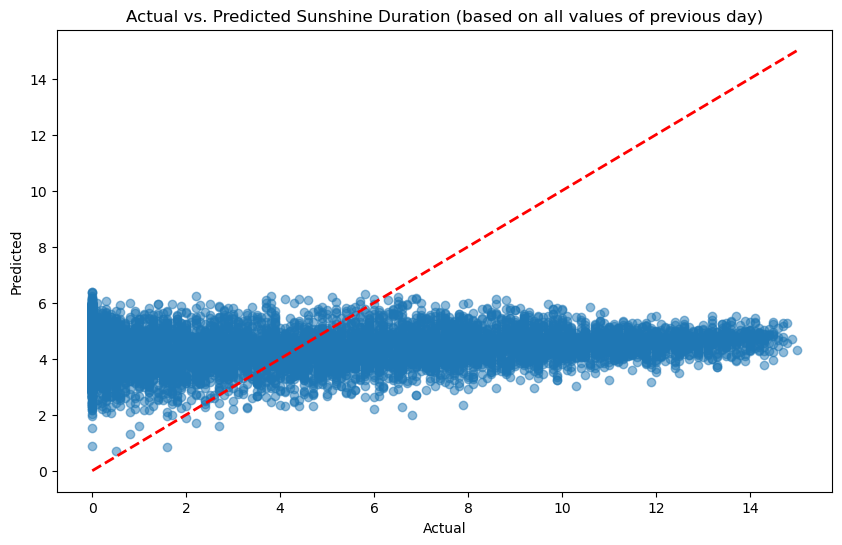

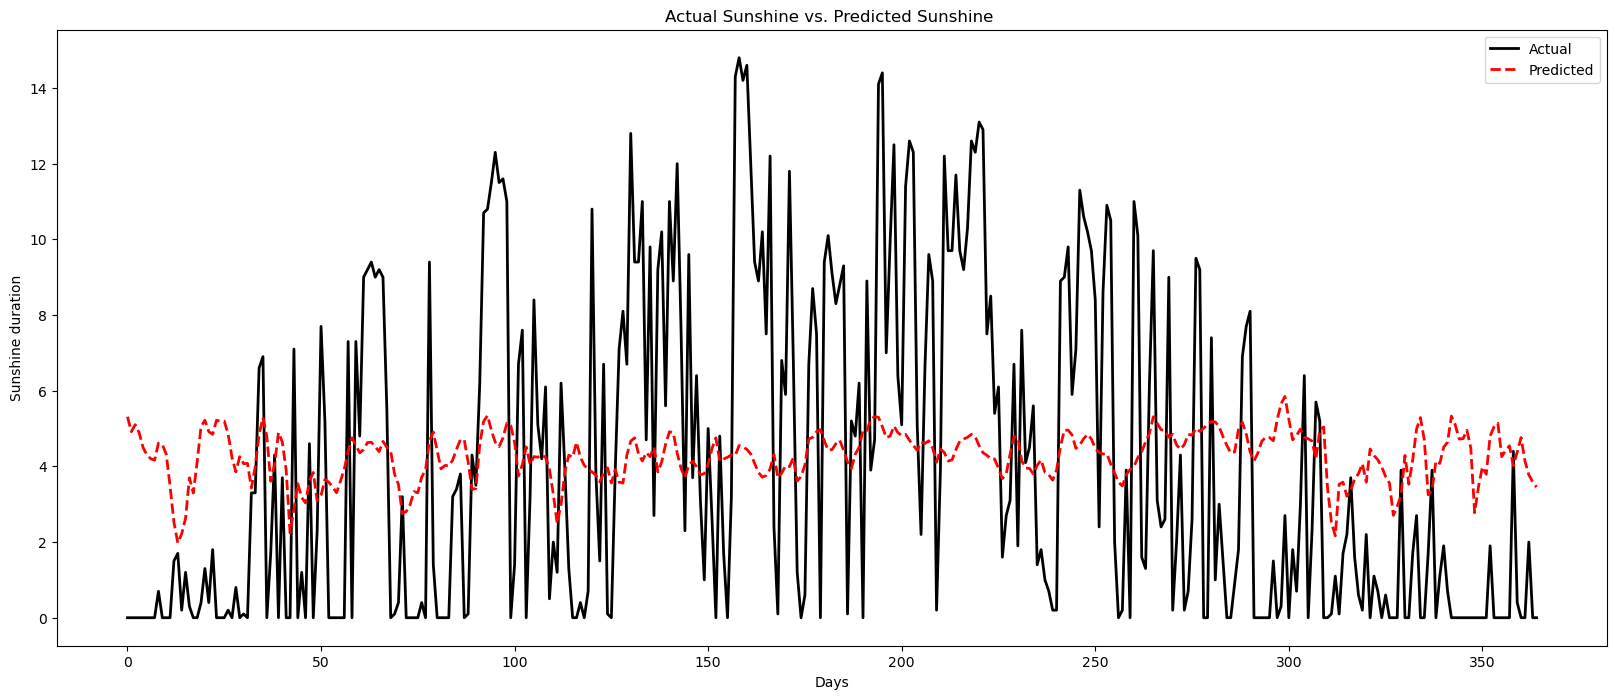

In [371]:
b = weather_df['target'].values
print(b)
A= weather_df[['PM']]
print(A)
# Adding a column of ones to X matrices for the intercept term
A = np.hstack((np.ones((A.shape[0], 1)), A))
print(A)
### coefficients of the least squared line 
beta = least_squares_qr_numpy(A, b)

print(np.shape(A)) 
print(np.shape(b))
y_hat = np.dot(A, beta)
print(y_hat)
import matplotlib.pyplot as plt

# Function to plot actual vs. predicted values
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()

# Plot for each model
plot_actual_vs_predicted(b, y_hat, 'Actual vs. Predicted Sunshine Duration (based on all values of previous day)')
# Function to plot actual vs. predicted values with annotations
def plot_with_annotations(y_true, y_pred, start=0, end=100):
    plt.figure(figsize=(20, 8))
    
    # Subset of data for clearer visualization
    y_true_subset = y_true[start:end]
    y_pred_subset= y_pred[start:end]
    days = np.arange(start, end)
    
    # Plot actual values
    plt.plot(days, y_true_subset, label='Actual', color='black', linewidth=2)
    
    # Plot predicted values with smoother lines
    plt.plot(days, y_pred_subset, label='Predicted', color='red', linestyle='--', linewidth=2)
    
    # Add title and labels
    plt.title('Actual Sunshine vs. Predicted Sunshine ')
    plt.xlabel('Days')
    plt.ylabel('Sunshine duration')
    
    # Add legend
    plt.legend()
    
    # Display the plot
    plt.show()

# Plot the graphs
plot_with_annotations(b, y_hat, start=0, end=365) # change these values to visualise subset of rows


In [372]:
# Calculate R-squared for evaluation
def r_squared(y_target, y_pred):
    ss_total = np.sum((y_target - np.mean(y_target)) ** 2)
    ss_residual = np.sum((y_target - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

r_squared_sunshine_onlyQR = r_squared(b, y_hat)

print("R-squared metric:", r_squared_sunshine_onlyQR)

R-squared metric: 0.02635105411077443


This is significantly worse compared to using previous day's sunshine, which gave a r-squared value of 0.34171311351224165

At this point using the previous day's sunshine amount is a better predictor than using the atmospheric pressure

### Implementation iii (without svd)

# d) iii) Use all current information to predict the sunshine the next day

In [308]:
b = weather_df['target'].values
A = weather_df.drop(columns=['target']).values

# Adding a column of ones to X matrices for the intercept term
A = np.hstack((np.ones((A.shape[0], 1)), A))



In [309]:
A

array([[ 1.00e+00,  1.01e+02,  1.01e+01, ...,  0.00e+00, -4.90e+00,
        -1.15e+01],
       [ 1.00e+00,  1.02e+02,  8.20e+00, ...,  4.80e+00, -4.00e-01,
        -1.10e+00],
       [ 1.00e+00,  1.03e+02,  8.20e+00, ...,  4.80e+00,  5.00e-01,
         1.30e+00],
       ...,
       [ 1.00e+00,  5.13e+02,  8.50e+00, ...,  1.82e+01,  1.30e+01,
         1.24e+01],
       [ 1.00e+00,  5.14e+02,  8.80e+00, ...,  1.85e+01,  1.17e+01,
         1.27e+01],
       [ 1.00e+00,  5.15e+02,  1.92e+01, ...,  1.98e+01,  5.80e+00,
         3.70e+00]])

### coefficients of the least squared line 

In [310]:
beta = least_squares_qr_numpy(A, b)


In [311]:
print(np.shape(A)) 
print(np.shape(b))

(8901, 16)
(8901,)


In [312]:
y_hat = np.dot(A, beta)
print(y_hat)

[1.76685953 2.40341716 2.6760375  ... 3.25115216 4.98900233 5.25648885]


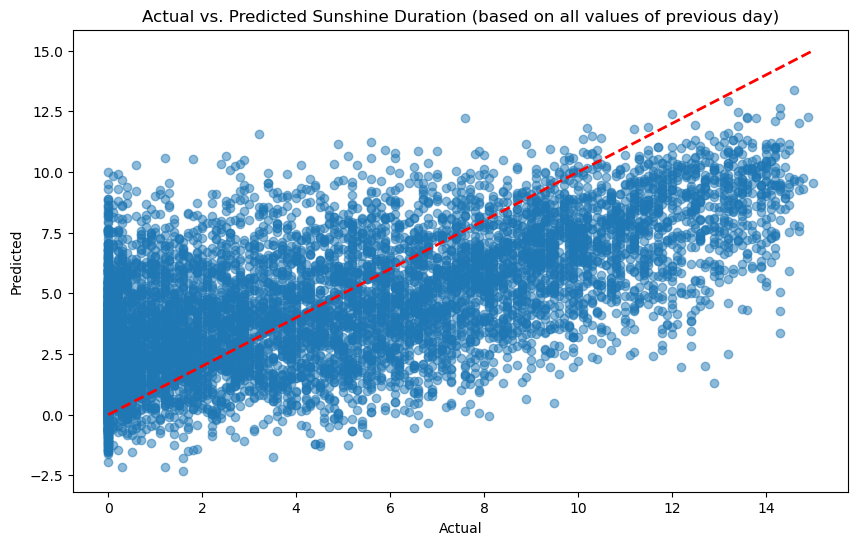

In [313]:
import matplotlib.pyplot as plt

# Function to plot actual vs. predicted values
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()

# Plot for each model
plot_actual_vs_predicted(b, y_hat, 'Actual vs. Predicted Sunshine Duration (based on all values of previous day)')

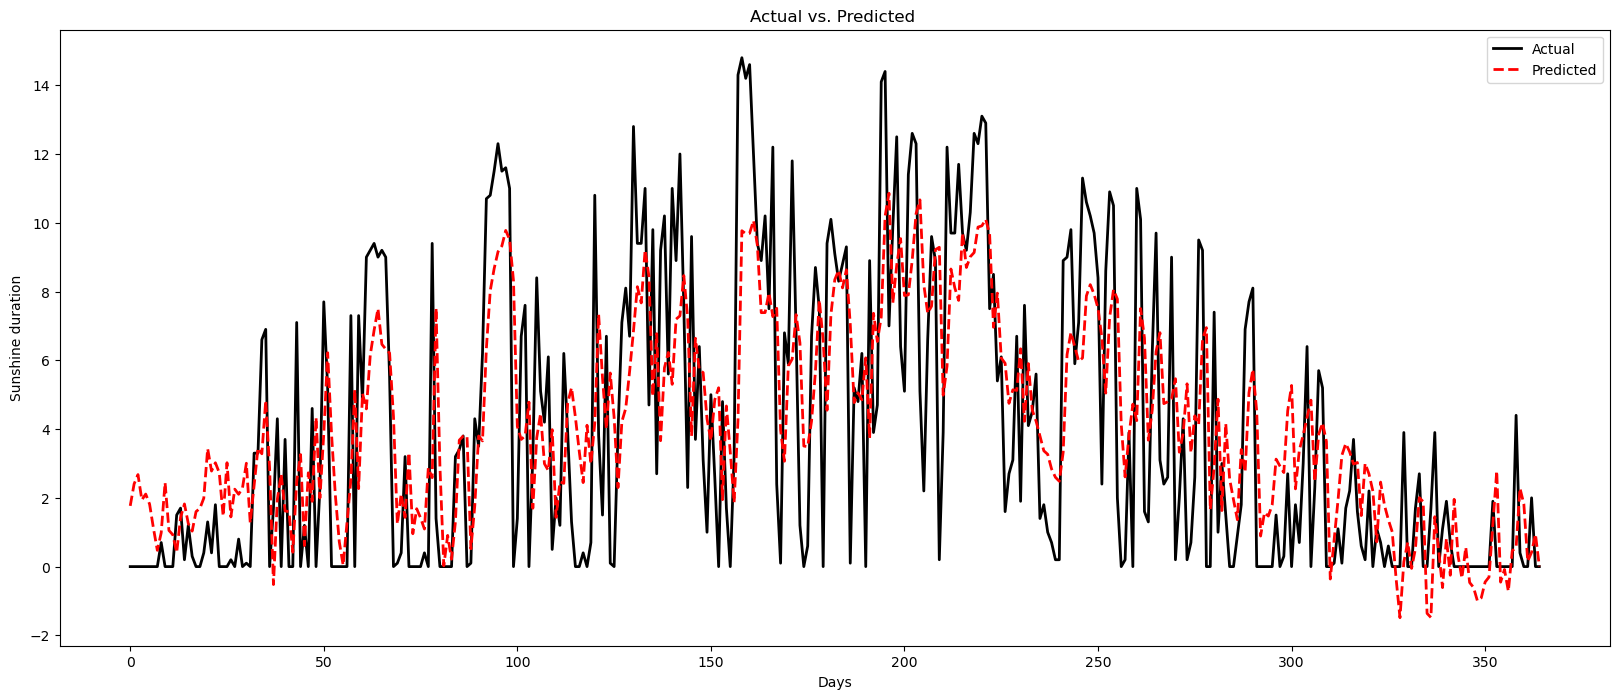

In [314]:
# Function to plot actual vs. predicted values with annotations
def plot_with_annotations(y_true, y_pred, start=0, end=100):
    plt.figure(figsize=(20, 8))
    
    # Subset of data for clearer visualization
    y_true_subset = y_true[start:end]
    y_pred_subset= y_pred[start:end]
    days = np.arange(start, end)
    
    # Plot actual values
    plt.plot(days, y_true_subset, label='Actual', color='black', linewidth=2)
    
    # Plot predicted values with smoother lines
    plt.plot(days, y_pred_subset, label='Predicted', color='red', linestyle='--', linewidth=2)
    
    # Add title and labels
    plt.title('Actual vs. Predicted ')
    plt.xlabel('Days')
    plt.ylabel('Sunshine duration')
    
    # Add legend
    plt.legend()
    
    # Display the plot
    plt.show()

# Plot the graphs
plot_with_annotations(b, y_hat, start=0, end=365) # change these values to visualise subset of rows


In [315]:
# Calculate R-squared for evaluation
def r_squared(y_target, y_pred):
    ss_total = np.sum((y_target - np.mean(y_target)) ** 2)
    ss_residual = np.sum((y_target - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

r_squared_sunshine_onlyQR = r_squared(b, y_hat)

print("R-squared metric:", r_squared_sunshine_onlyQR)


R-squared metric: 0.4340940727671584


# Prediction of metrics using SVD (Singular Value Decomposition)

In [374]:
b = weather_df['target'].values
A = weather_df.drop(columns=['target']).values
# Adding a column of ones to X matrices for the intercept term
A = np.hstack((np.ones((A.shape[0], 1)), A))

m,n = np.shape(A)
print (m,n)

8901 16


In [375]:
U,S,VT = np.linalg.svd(A)
V = VT.T

In [376]:
print("shape of U", np.shape(U), "\n")
print("S", S, "\n")
print("Shape of S", np.shape(S), "\n")
print("Shape of V", np.shape(V), "\n")

shape of U (8901, 8901) 

S [1.15148606e+05 2.68713527e+04 1.59961053e+03 9.85272167e+02
 4.41572094e+02 3.46138330e+02 2.74757935e+02 2.43775647e+02
 2.01197276e+02 1.72128414e+02 1.06459204e+02 9.54615287e+01
 8.15816461e+01 7.78725984e+01 6.03727284e+01 6.88719364e-01] 

Shape of S (16,) 

Shape of V (16, 16) 



In [377]:
# append zeroes to the singular matrix 
if m!=n:
    Sigma = np.zeros([m,n])
    for row in range (len(S)):
        Sigma[row,row]=S[row]
else:
    Sigma = np.diag(S)
print(Sigma)

[[115148.60597918      0.              0.         ...      0.
       0.              0.        ]
 [     0.          26871.35270972      0.         ...      0.
       0.              0.        ]
 [     0.              0.           1599.61052571 ...      0.
       0.              0.        ]
 ...
 [     0.              0.              0.         ...      0.
       0.              0.        ]
 [     0.              0.              0.         ...      0.
       0.              0.        ]
 [     0.              0.              0.         ...      0.
       0.              0.        ]]


### Removing columns in U and V to obtain a reduced SVD 
##### Since there are (r number of) rows which are 0 in Sigma, we can remove r number of columns from U. 

In [417]:
# select only first r columns of U and V and first r columns of and rows of Sigma
r= 15
U_r = U[:, 0:r]
Sigma_r = Sigma[0:r, 0:r]  # rxr matrix 
V_r = V[:, 0:r]
A_approximate= np.matmul(np.matmul(U_r, Sigma_r), V_r.T)

print("U_r is: \n", U_r, "\n")
print("Sigma_r is: \n", Sigma_r, "\n")
print("V_r transpose is: \n", V_r.T, "\n")
print("A (rounded) from reduced SVD= \n", np.round(A_approximate, decimals=2), "\n")

print("Original A= \n", A)

frobenius_norm = np.linalg.norm(A - A_approximate, ord='fro')
print("Frobenius norm of A- A_approximate = ", frobenius_norm)

U_r is: 
 [[-0.00770841  0.01902904  0.01794921 ... -0.02893449 -0.01512937
  -0.00606868]
 [-0.00768025  0.01889054  0.01337654 ... -0.02479006  0.00500076
  -0.01476762]
 [-0.00769674  0.01889695  0.00908286 ...  0.00416293  0.00110344
   0.00323904]
 ...
 [-0.00957818  0.0058935  -0.00215124 ...  0.00703689  0.00337786
  -0.00310471]
 [-0.00960302  0.00592636 -0.00460442 ... -0.00641897  0.00982177
   0.00073131]
 [-0.00966517  0.00607506 -0.00162273 ...  0.01942458 -0.03056731
  -0.00907599]] 

Sigma_r is: 
 [[1.15148606e+05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.68713527e+04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+

In [425]:
frobenius_norm = np.linalg.norm(A, ord='fro')
print("Frobenius norm of A = ", frobenius_norm)

Frobenius norm of A- A_approximate =  118259.70237857869


In [418]:
print("shape of U_r", np.shape(U_r), "\n")
print("Shape of V_r", np.shape(V_r), "\n")

shape of U_r (8901, 15) 

Shape of V_r (16, 15) 



#### No information has been lost when we multiply the U_reduced, Sigma_reduced, V_reduced and we get back A. However we dont have some rows and columns of the singular matrix

### Transform the original matrix A
A_reduced ​=U_r.​Σ_r​

In [419]:
A_r = np.matmul(U_r, Sigma_r)
print("Redced A= ", A_r, "\n")
print("Rounded Reduced A= \n", np.round(A_r, decimals =4))
print(np.shape(A_r))

Redced A=  [[-8.87612394e+02  5.11335964e+02  2.87117376e+01 ... -2.36052359e+00
  -1.17816301e+00 -3.66382566e-01]
 [-8.84370321e+02  5.07614307e+02  2.13972577e+01 ... -2.02241351e+00
   3.89422519e-01 -8.91561721e-01]
 [-8.86268878e+02  5.07786650e+02  1.45290359e+01 ...  3.39618871e-01
   8.59273717e-02  1.95549588e-01]
 ...
 [-1.10291462e+03  1.58366399e+02 -3.44114965e+00 ...  5.74080969e-01
   2.63042679e-01 -1.87439787e-01]
 [-1.10577422e+03  1.59249387e+02 -7.36528242e+00 ... -5.23670290e-01
   7.64846894e-01  4.41513080e-02]
 [-1.11293053e+03  1.63244953e+02 -2.59573169e+00 ...  1.58468946e+00
  -2.38035562e+00 -5.47942522e-01]] 

Rounded Reduced A= 
 [[-8.8761240e+02  5.1133600e+02  2.8711700e+01 ... -2.3605000e+00
  -1.1782000e+00 -3.6640000e-01]
 [-8.8437030e+02  5.0761430e+02  2.1397300e+01 ... -2.0224000e+00
   3.8940000e-01 -8.9160000e-01]
 [-8.8626890e+02  5.0778660e+02  1.4529000e+01 ...  3.3960000e-01
   8.5900000e-02  1.9550000e-01]
 ...
 [-1.1029146e+03  1.5836640e

In [420]:
print(np.shape(b))

(8901,)


In [421]:
### coefficients of the least squared line 
beta = least_squares_qr(A_r, b)


In [422]:
y_hat = np.dot(A_r, beta)
print(y_hat)

[0.98752049 1.9325047  2.42762189 ... 3.76967521 5.4730664  5.27291426]


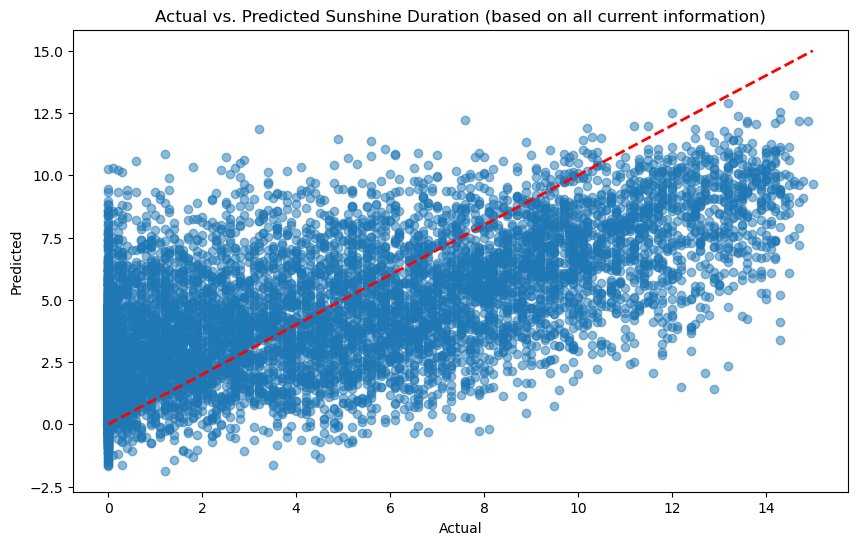

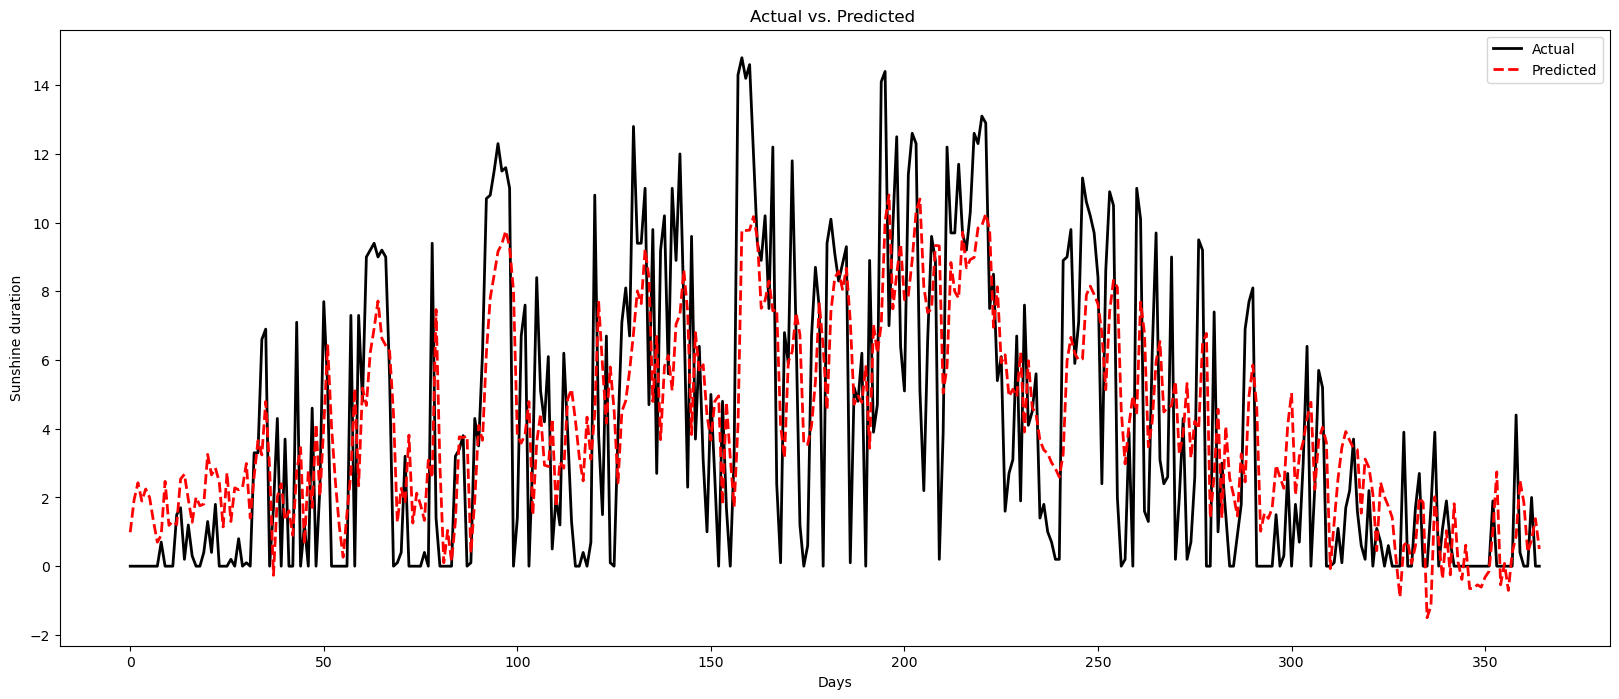

In [423]:


# Function to plot actual vs. predicted values
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()

# Plot for each model
plot_actual_vs_predicted(b, y_hat, 'Actual vs. Predicted Sunshine Duration (based on all current information)')
# Function to plot actual vs. predicted values with annotations
def plot_with_annotations(y_true, y_pred, start=0, end=100):
    plt.figure(figsize=(20, 8))
    
    # Subset of data for clearer visualization
    y_true_subset = y_true[start:end]
    y_pred_subset= y_pred[start:end]
    days = np.arange(start, end)
    
    # Plot actual values
    plt.plot(days, y_true_subset, label='Actual', color='black', linewidth=2)
    
    # Plot predicted values with smoother lines
    plt.plot(days, y_pred_subset, label='Predicted', color='red', linestyle='--', linewidth=2)
    
    # Add title and labels
    plt.title('Actual vs. Predicted ')
    plt.xlabel('Days')
    plt.ylabel('Sunshine duration')
    
    # Add legend
    plt.legend()
    
    # Display the plot
    plt.show()

# Plot the graphs
plot_with_annotations(b, y_hat, start=0, end=365) # change these values to visualise subset of rows



In [424]:

# Calculate R-squared for evaluation
def r_squared(y_target, y_pred):
    ss_total = np.sum((y_target - np.mean(y_target)) ** 2)
    ss_residual = np.sum((y_target - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

r_squared_sunshine_onlyQR = r_squared(b, y_hat)

print("R-squared metric:", r_squared_sunshine_onlyQR)

R-squared metric: 0.4309824502582168


Previous r squared metric without SVD was 0.4340940727671584

After tweaking r in SVD \
r = 15, r squared metric = 0.4309824502582168 \
r = 13, r squared metric = 0.4303715101419606 \
r = 10 , r squared metric = 0.4257325189592154 \
r = 7 , r squared metric = 0.41003188085665954 \
r = 5 , r squared metric = 0.40359803322230203 



## Conlusion 
### When given two metrics Wind pressure and Sunshine value, sunshine value is a better metric to predict the sunshine of the next day. 
### We have used two methods to do the prediction, Least Square Regression method and using SVD (Singular Value Decomposition), and both the methods show the same conclusion. 
